<a href="https://colab.research.google.com/github/scottwmwork/DS-Unit-2-Applied-Modeling/blob/master/module2/assignment_applied_modeling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Plot the distribution of your target. 
    - Regression problem: Is your target skewed? Then, log-transform it.
    - Classification: Are your classes imbalanced? Then, don't use just accuracy. And try `class_balance` parameter in scikit-learn.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline?
- [ ] Share at least 1 visualization on Slack.

You need to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.


## Reading

### Today
- [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn)
- [Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/)
- [Machine Learning Meets Economics](http://blog.mldb.ai/blog/posts/2016/01/ml-meets-economics/)
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)


### Yesterday
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), **by Lambda DS3 student** Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)






In [0]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install packages in Colab
    !pip install category_encoders==2.0.0
    !pip install pandas-profiling==2.3.0
    !pip install plotly==4.1.1

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/scottwmwork/datasets/master/tmdb_5000_movies.csv')

# plot distribution

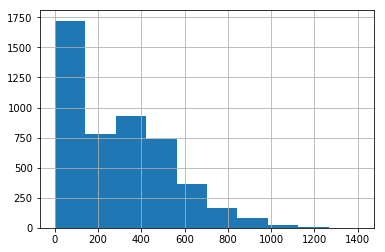

In [0]:
df_cubed_root = df.revenue**(1/3)
df_cubed_root.hist()

## Engineer Features/Wrangle Data

In [0]:
def wrangle(X):
  
  X = X.copy()
  X = X.reset_index()
  
  
  #Features to not include:
  X = X.drop(columns = ['genres','homepage','keywords','overview','production_companies','production_countries','spoken_languages','tagline'])
  
  #Engineer features:
  
  #original title is same as title?
  title_changed = []
  for x in range(0,len(X['title'])):
    if X['title'][x] == X['original_title'][x]:
       title_changed.append(0)
    else:
       title_changed.append(1)
  
  #length of title
  length_of_title = []
  for x in X['title']:
    length_of_title.append(len(x))
  
  #Add features to dataframe
  X['title_changed'] = title_changed
  X['length_of_title'] = length_of_title
   
  
  return X

In [0]:
df['release_date'] = pd.to_datetime(df['release_date'],infer_datetime_format = True)
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.month
df = df.drop(columns = 'release_date')

In [0]:
#Isolate the test set
test = df[df['release_year'] == 2016]
y_test = test['revenue']
X_test = test.drop(columns = 'revenue')


#Exclude test set from data
dfn = df[df['release_year'] != 2016]

In [0]:
#Create train and validation data 
from sklearn.model_selection import train_test_split
train, val = train_test_split(dfn, train_size = .80, test_size = 0.20, random_state = 42)

y_train = train.revenue
X_train = train.drop(columns = 'revenue')

y_val = val.revenue
X_val = val.drop(columns = 'revenue')

In [0]:
#Wrangle data
X_test = wrangle(X_test)
X_val = wrangle(X_val)
X_train = wrangle(X_train)

# Fit a model

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer 
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(
  # SimpleImputer(strategy = 'mean'),
  ce.OneHotEncoder(use_cat_names = True),
  SimpleImputer(),  
  DecisionTreeClassifier(random_state = 42)
)

pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['original_language', 'original_title',
                                     'status', 'title'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impuri